<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Познакомимся-с-данными" data-toc-modified-id="Познакомимся-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Познакомимся с данными</a></span></li><li><span><a href="#Проверка-эффективности-обогащения" data-toc-modified-id="Проверка-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка эффективности обогащения</a></span></li><li><span><a href="#Чего-нет-в-тестовой-выборке?" data-toc-modified-id="Чего-нет-в-тестовой-выборке?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Чего нет в тестовой выборке?</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья" data-toc-modified-id="Распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Восстановление золота из руды

Прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Проделаем следующие этапы:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


## Подготовка данных

In [10]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor

from sklearn.utils import shuffle

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Познакомимся с данными

In [14]:
def find_and_select_data_files(data_sources, assign_to=None):

    data_frames = {}

    for variable, paths in data_sources.items():
        for file_path in paths:
            file = Path(file_path)
            if file.exists() and file.is_file():
                try:
                    if file.suffix == '.csv':
                        df = pd.read_csv(file)
                    elif file.suffix in ['.xls', '.xlsx']:
                        df = pd.read_excel(file)
                    else:
                        print(f"Формат файла '{file.suffix}' не поддерживается.")
                        continue

                    data_frames[variable] = df
                    print(f"Для переменной '{variable}' прочитан файл: {file}")

                    if assign_to is not None and variable in assign_to:
                        globals()[assign_to[variable]] = df

                except Exception as e:
                    print(f"Ошибка при чтении файла '{file}': {e}")
                break
        else:
            print(f"Файл данных для переменной '{variable}' не найден.")
    
    return data_frames

In [15]:
data_sources = {
    "test": ['/datasets/gold_recovery_test_new.csv', 'gold_recovery_test_new.csv'],
    "full": ['/datasets/gold_recovery_full_new.csv', 'gold_recovery_full_new.csv'],
    "train": ['/datasets/gold_recovery_train_new.csv', 'gold_recovery_train_new.csv']
}

assignments = {
    "test": "test",
    "full": "full",
    "train": "train"
}


dfs = find_and_select_data_files(data_sources, assign_to=assignments)

Для переменной 'test' прочитан файл: gold_recovery_test_new.csv
Для переменной 'full' прочитан файл: gold_recovery_full_new.csv
Для переменной 'train' прочитан файл: gold_recovery_train_new.csv


In [34]:
full.profile_report(minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
train.shape

(14149, 87)

In [7]:
test.shape

(5290, 53)

In [8]:
full.shape

(19439, 87)

In [9]:
train.isna().sum()

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 2

In [10]:
test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [11]:
full.isna().sum()

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 3

Вот что имеем:
* Есть различия в признаках между тестовым и тренировочным наборами данных. 
* Полный набор данных содержит все признаки test и train
* В наблюдениях содержатся 19.4 тыс измерений в рамках одного и того же технологического процесса. Это подтверждает нормальное распределение величин в выборке full
* Есть пропуски на всех выборках. Заполнять будем методом ffill в fillna, экстаполируя предидущие значения на пропущенные. Этот подход, вероятно, будет подходящим, т.к. мы имеем дело с нормальным распределением в рамках повторяющегося процеесса с большим количеством измерений. Проверим это на test с помощью сравнения расчетов recovery: 

###  Проверка эффективности обогащения

In [12]:
train = train.fillna(method='ffill')

In [13]:
train.isna().sum().sum()

0

Для сверки сравним готовые расчеты эфективности обогощения и наш расчет по формуле:

In [19]:
c = train['rougher.output.concentrate_au']
f = train['rougher.input.feed_au']
t = train['rougher.output.tail_au']

In [20]:
recovery_pred = ((c*(f - t)) / (f*(c - t)) * 100)
recovery_pred.mean()

82.70450164550293

In [21]:
train['rougher.output.recovery'].mean()

82.70450164550293

Средние идентичны. Проверим MAE:

In [22]:
mean_absolute_error(train['rougher.output.recovery'], recovery_pred)

9.73512347450521e-15

Действительно, ошибка незначительная, значит:
* ffill работает как следует
* Заложенные расчеты корректны

###  Чего нет в тестовой выборке?

In [23]:
missed_values = []
for i in full.columns:
    if i not in test.columns:
        missed_values.append(i)
        
missed_values

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Много чего!
Все эти величины связаны с непосредственными результатами стадий технологического процесса. Train моделирует продуктивную(реальную) ситуацию, в которой, до проведения процесса мы не можем знать этих значений

###  Предобработка

In [19]:
full = full.fillna(method='ffill')
test = test.fillna(method='ffill')

На данном этапе можем отметить следующее:
* Данные составлены корректно с точки зрения проверки расчетов
* Есть пропуски в данных - выбранный метод заполнения - ffill, наиболее подходящий для моделирования и анализа данного типа процессов
* Изучили предоставленные датасеты - в тестовой выборке на 34 значения признаков меньше. Далее будем разбираться что это может означать. 

## Анализ данных

###  Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

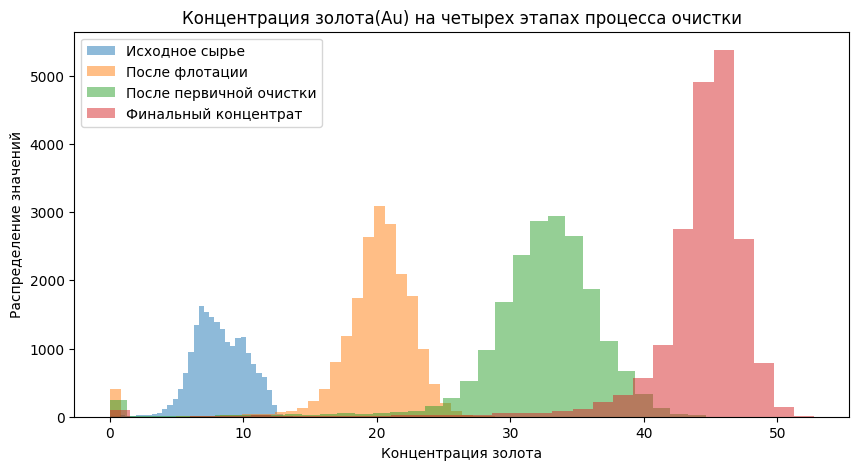

In [37]:
%matplotlib inline

plt.figure(figsize=(10,5))
full['rougher.input.feed_au'].plot(kind='hist', bins=35, alpha=0.5)
full['rougher.output.concentrate_au'].plot(kind='hist', bins=35, alpha=0.5)
full['primary_cleaner.output.concentrate_au'].plot(kind='hist', bins=35, alpha=0.5)
full['final.output.concentrate_au'].plot(kind='hist', bins=35, alpha=0.5)

plt.title('Концентрация золота(Au) на четырех этапах процесса очистки')
plt.legend(['Исходное сырье', 'После флотации', 'После первичной очистки', 'Финальный концентрат'])
plt.xlabel('Концентрация золота')
plt.ylabel('Распределение значений')

plt.show()

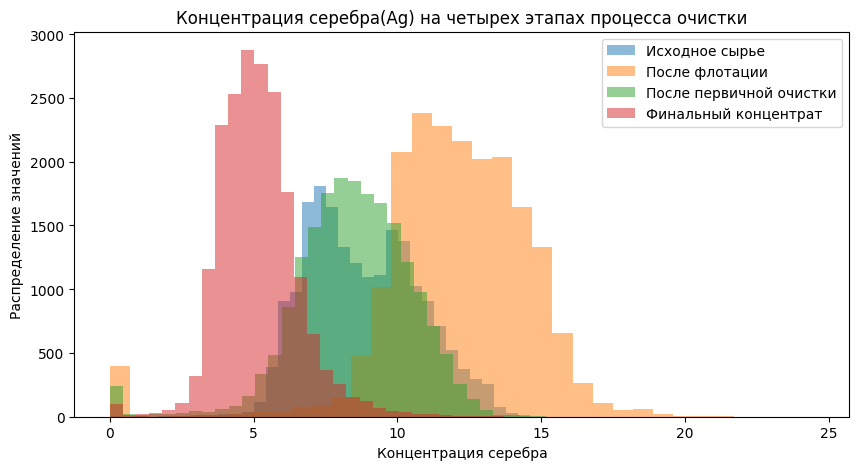

In [38]:
plt.figure(figsize=(10,5))
full['rougher.input.feed_ag'].plot(kind='hist', bins=35, alpha=0.5)
full['rougher.output.concentrate_ag'].plot(kind='hist', bins=35, alpha=0.5)
full['primary_cleaner.output.concentrate_ag'].plot(kind='hist', bins=35, alpha=0.5)
full['final.output.concentrate_ag'].plot(kind='hist', bins=35, alpha=0.5)

plt.title('Концентрация серебра(Ag) на четырех этапах процесса очистки')
plt.legend(['Исходное сырье', 'После флотации', 'После первичной очистки', 'Финальный концентрат'])
plt.xlabel('Концентрация серебра')
plt.ylabel('Распределение значений')

plt.show()

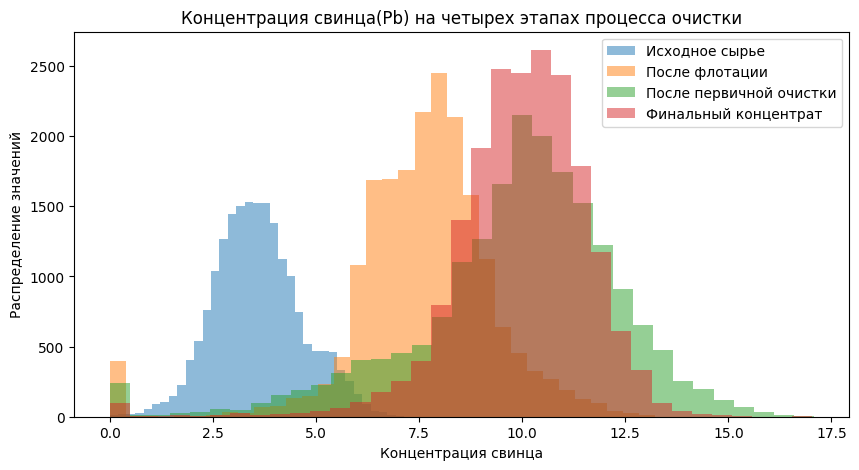

In [39]:
plt.figure(figsize=(10,5))
full['rougher.input.feed_pb'].plot(kind='hist', bins=35, alpha=0.5)
full['rougher.output.concentrate_pb'].plot(kind='hist', bins=35, alpha=0.5)
full['primary_cleaner.output.concentrate_pb'].plot(kind='hist', bins=35, alpha=0.5)
full['final.output.concentrate_pb'].plot(kind='hist', bins=35, alpha=0.5)

plt.title('Концентрация свинца(Pb) на четырех этапах процесса очистки')
plt.legend(['Исходное сырье', 'После флотации', 'После первичной очистки', 'Финальный концентрат'])
plt.xlabel('Концентрация свинца')
plt.ylabel('Распределение значений')

plt.show()

По мере прохождения технологического процесса:

* Концентрация золота увеличивается равномерно от этапа к этапу. Максимальный скачек концентрации происходит на финальном этапе. Пики концентрации золота после певичной очисткой сравнимы со значениями после флотации.  
* Флотация увеличивает концентрацию серебра, а вот после первичной очистки, концентрация скеребра возвращается к начальному уровню - вероятно, на этапе флотации уходят более легкие фракции в хвосты, а серебро остается и концентрация увеличивается.  Затем серебро продолжает снижение концентрации на финальном этапе в угоду целевого продукта. 
* Концентрация Свинца относительно увеличивается только до этапа первичной очистки, а затем остается неизменным. 
* Технологический процесс прежде всего нацелен на повышение концентрации золота, это, вероятно приводит к потерям серебра при отбрасывании "хвостов", как более легкого металла, по сравнению со свинцом, концентрация которого почти не меняется, так как тящелые фракции убирвать сложнее - есть риск убрать целевой металл (золото)
* Есть выбросы на нулевых значениях - нулевой концентрации, вероятно, быть не может, однако, возможны дополнительные условия тех процесса, о которых мы не знаем, и, возможно, использование особого типа эксперементального первичного сырья без тех или иных примесей. Пожтому удалять эти значения не будем. Стоит учитывать наличие выбросов при модернизации процесса сбора данных, если такие выбросы не допустимы.  

 ### Распределения размеров гранул сырья

C:\Users\klyuchevenko.e\Desktop\DS\ya\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\klyuchevenko.e\Desktop\DS\ya\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


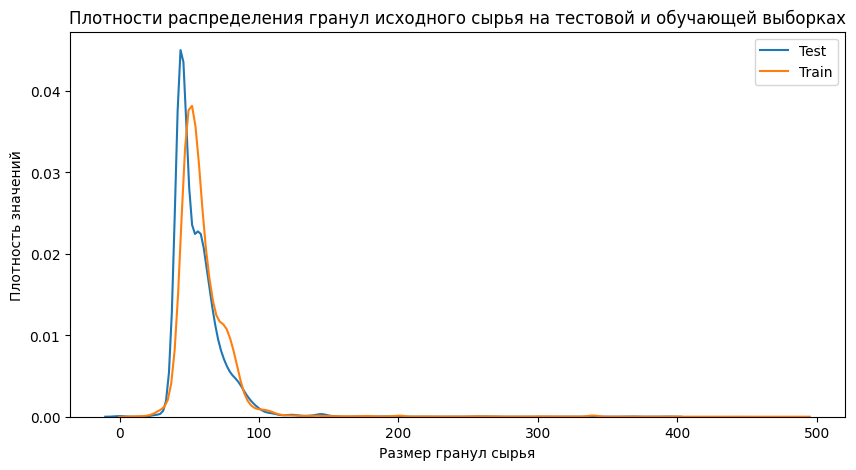

In [41]:
plt.figure(figsize=(10,5))

sns.kdeplot(data=test['rougher.input.feed_size'])
sns.kdeplot(data=train['rougher.input.feed_size'])

plt.title('Плотности распределения гранул исходного сырья на тестовой и обучающей выборках')
plt.legend(['Test', 'Train'])
plt.xlabel('Размер гранул сырья')
plt.ylabel('Плотность значений')

plt.show()

Распределение размеров гранул нормальное визуально в обеих выборках - на качество модели такие значения не должны повлиять. 

C:\Users\klyuchevenko.e\Desktop\DS\ya\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\klyuchevenko.e\Desktop\DS\ya\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


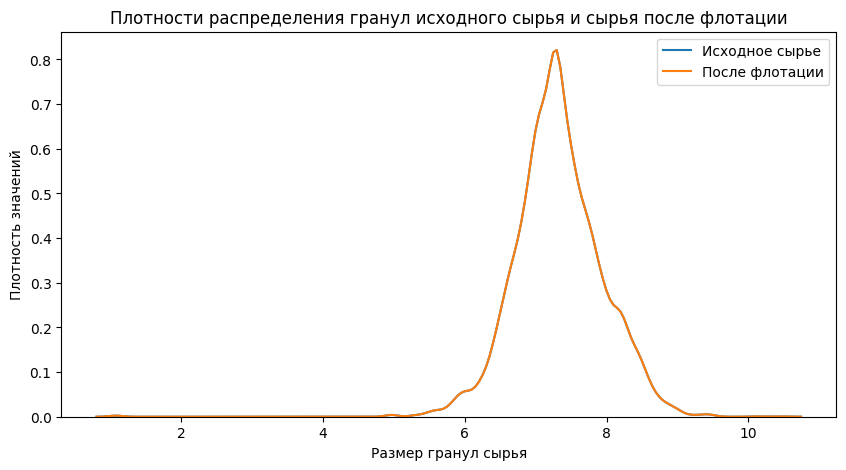

In [42]:
plt.figure(figsize=(10,5))

sns.kdeplot(data=train['primary_cleaner.input.feed_size'])
sns.kdeplot(data=train['primary_cleaner.input.feed_size'])

plt.title('Плотности распределения гранул исходного сырья и сырья после флотации')
plt.legend(['Исходное сырье', 'После флотации'])
plt.xlabel('Размер гранул сырья')
plt.ylabel('Плотность значений')

plt.show()

Сравнение плотностей размеров гранул исходного сырья и после флотации показывает, что размер гранул сокращается примерно в 50 раз после флотации. Также видно, что распределение размеров после флотации имеет гораздо меньшую дисперсию и один явный пик на средних значениях плотности.

 ### Суммарная концентрация всех веществ на разных стадиях

In [43]:
sum_process = pd.DataFrame(columns=['rougher', 'cleaner', 'final'])
sum_process['final'] = full['final.output.concentrate_ag'] + full['final.output.concentrate_pb'] + full['final.output.concentrate_sol'] + full['final.output.concentrate_au']
sum_process['cleaner'] = full['rougher.input.feed_ag'] + full['rougher.input.feed_pb'] + full['rougher.input.feed_sol'] + full['rougher.input.feed_au']
sum_process['rougher'] = full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_sol'] + full['rougher.output.concentrate_au']

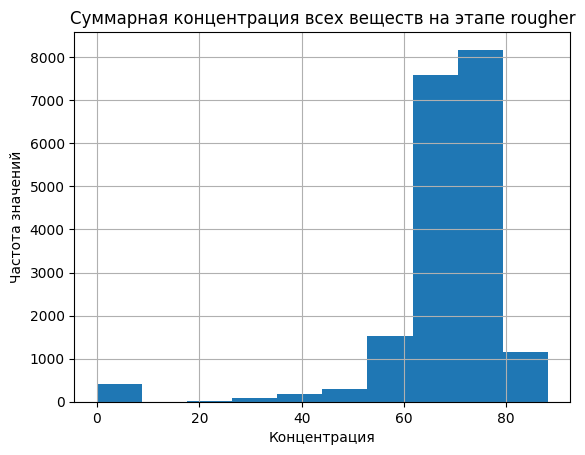

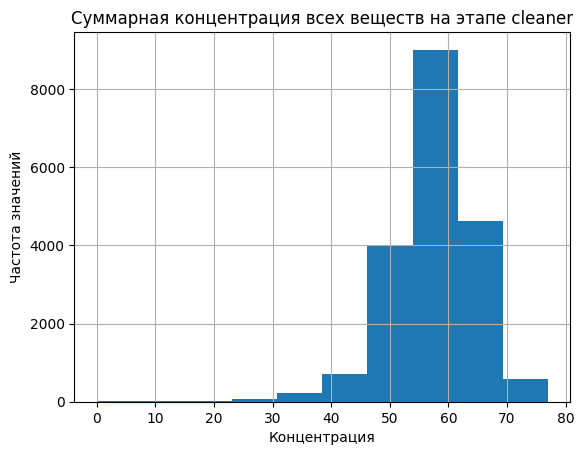

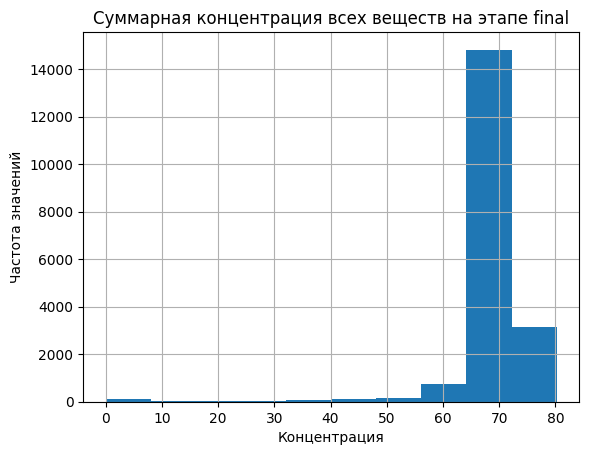

In [44]:
for column in sum_process.columns:

    sum_process.hist(column)
    plt.title(f'Суммарная концентрация всех веществ на этапе {column}')
    plt.xlabel('Концентрация')
    plt.ylabel('Частота значений')


In [45]:
sum_process.min()

rougher    0.00
cleaner    0.04
final      0.00
dtype: float64

Главным образом стоит обратить внимание на выбросы в районе нуля. Нулевых значений ни на одной из стадий быть не может - эти значения отбросим. Также, вероятно, выброс стоит ограничить еще больше, но для этого необходимы более глубокие знания тех процесса.

In [47]:
full = full.drop(
    sum_process.query('(final == 0) | (cleaner == 0) | (rougher == 0)').index,
    axis=0,
    errors='ignore'
)

In [48]:
train = train.query('date in @full.date')
test = test.query('date in @full.date')

* рисков для некорректной работы модели из-за различий размеров гранул сырья на tarin и test нет. Проверили на плотностях распределений
* наблюдается двухкратное сокращение разеров гранул после флотации и сопровождается снижением дисперсии
* нулевые значения в суммарных концентрациях веществ привели к удалению таких, нетипичных наблюдений из датасетов. 

## Модель

Подготовим обучающие и тестовые выборки для генеральной работы с подобранной моделью:

In [49]:
prod_features_train = train
for column in train.columns:
    if column not in test.columns:
        
        prod_features_train = prod_features_train.drop(column, axis=1)
prod_target_train = train['rougher.output.recovery'], train['final.output.recovery']

In [50]:
prod_features_test = test

In [51]:
test = test.merge(full.loc[:,('date', 'final.output.recovery', 'rougher.output.recovery')], how='inner', on='date')

In [52]:
prod_target_test = test['rougher.output.recovery'], test['final.output.recovery']

In [53]:
prod_target_test[0].shape

(5154,)

In [54]:
prod_target_test[1].shape

(5154,)

In [55]:
prod_features_train.shape

(13795, 53)

In [56]:
prod_features_test.shape

(5154, 53)

Для обучения модели таймстэмп нам не нужен - он не играет роли в прогнозе

In [57]:
prod_features_train = prod_features_train.drop('date', axis=1)
prod_features_test = prod_features_test.drop('date', axis=1)

Подготовим расчет эффективности процессов очистки для подбора и проверки моделей

In [58]:
def smape(target, predicted):
    
    if type(target) == tuple:
        target_rougher = np.array(target[0])
        target_final = np.array(target[1])

        score_rougher = ((
            sum(
                abs(
                    target_rougher - predicted[0]
                ) / ((
                    abs(target_rougher) + abs(predicted[0])
                ) / 2)
            )        
        ) / len(target_rougher)) * 100
        
        score_final = ((
            sum(
                abs(
                    target_final - predicted[1]
                ) / ((
                    abs(target_final) + abs(predicted[1])
                ) / 2)
            )        
        ) / len(target_final)) * 100
        
        return ((score_rougher * 0.25) + (score_final * 0.75))    
     
    else:
        
        target = np.array(target)
        score_final = ((
            sum(
                abs(
                    target - predicted
                ) / ((
                    abs(target) + abs(predicted)
                ) / 2)
            )        
        ) / len(target)) * 100
        
        return score_final * (-1)  

In [59]:
def model_check(model, test=False):
    if test == False:

        target_tuple = prod_target_train
        
        model.fit(prod_features_train, prod_target_train[1])
        final_predict = model.predict(prod_features_train)
        model.fit(prod_features_train, prod_target_train[0])
        rougher_predict = model.predict(prod_features_train)        
        
    else: 

        target_tuple = prod_target_test
        
        model.fit(prod_features_train, prod_target_train[1])
        final_predict = model.predict(prod_features_test)
        model.fit(prod_features_train, prod_target_train[0])
        rougher_predict = model.predict(prod_features_test)

    predict_tuple = rougher_predict, final_predict

    return smape(target_tuple, predict_tuple)

Проведем поборку гиперпараметров с помощью RandomSearchCV. Для этого:
* Значение smape будем использовать с изменением знака возвращаемого значения. Это необходимо, т.к. по умолчанию механизмы RandomSearchCV максимизируют параметры, а нам нужно сократить ошибку sMAPE
* Функцию для подсчета ошибки будем использовать в скорере метода 
* подбирать будем путем минимизации только одной части - эффективность обогащения финального концентрата, т.к. таргет в этом процессе может быть только один, а в данной части влияние на общую суммарную ошибку наиболее значимо (75%)

In [41]:
%%time

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
max_depth = [None] + [i for i in range(2, 11)]

random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth
}


random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state = 123456),
    param_distributions = random_grid,
    n_iter = 30, cv = 5, verbose=10, n_jobs = -1,
    scoring=make_scorer(smape, greater_is_better=False)
)
random_search.fit(prod_features_train, prod_target_train[1])

final_model = random_search.best_estimator_

print ('Лучшая модель', final_model, '\n')
print ('Набор лучших параметров:', random_search.best_params_, '\n')
print ('Score на этих параметрах:', random_search.best_score_, '\n')


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START max_depth=8, n_estimators=1................................
[CV 1/5; 1/30] END ..............max_depth=8, n_estimators=1; total time=   0.5s
[CV 2/5; 1/30] START max_depth=8, n_estimators=1................................
[CV 2/5; 1/30] END ..............max_depth=8, n_estimators=1; total time=   0.5s
[CV 3/5; 1/30] START max_depth=8, n_estimators=1................................
[CV 3/5; 1/30] END ..............max_depth=8, n_estimators=1; total time=   0.4s
[CV 4/5; 1/30] START max_depth=8, n_estimators=1................................
[CV 4/5; 1/30] END ..............max_depth=8, n_estimators=1; total time=   0.4s
[CV 5/5; 1/30] START max_depth=8, n_estimators=1................................
[CV 5/5; 1/30] END ..............max_depth=8, n_estimators=1; total time=   0.5s
[CV 1/5; 2/30] START max_depth=10, n_estimators=1...............................
[CV 1/5; 2/30] END .............max_depth=10, n

Попробуем сделать шкалирование:

Ошибка получилась выше. Не будем использовать шкалирование

Попробуем линейные модели:

In [42]:
linear_model = LinearRegression()
scores = cross_val_score(
    linear_model, prod_features_train, prod_target_train[1], 
    cv=5, scoring=make_scorer(smape, greater_is_better=False)
)
final_score = sum(scores) / len(scores)

print('Средняя оценка качества модели на оценке финального этапа очистки:', final_score)

Средняя оценка качества модели на оценке финального этапа очистки: 10.990200515157941


In [43]:
lasso_model = Lasso(random_state=123456)
scores = cross_val_score(
    lasso_model, prod_features_train, prod_target_train[1], 
    cv=5, scoring=make_scorer(smape, greater_is_better=False)
)
final_score = sum(scores) / len(scores)

print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 10.39915108450246


После проверки трех моделей с кросс валидацией и подбором гиперпараметров в случае со слоучайным лесом, оказалось, на smape для расчета эфективности финальной очистки, лучшая модель - Случайный лес.

И протестируем модель:

In [44]:
model_check(model=final_model, test=True)

9.252322016126268

In [45]:
baseline_model = DummyRegressor(
    strategy='mean'
)

model_check(model=baseline_model, test=True)

7.766604067388502

Здесь разница с базовой моделью на тесте осталась на уровне 2%

In [46]:
# код ревьюера
model_check(model=RandomForestRegressor(random_state = 123456, n_estimators=100, max_depth=10), test=True)

7.158424539597852

## Выводы

В рамках работы был проанализзирован процесс очистки золота из сырья на всех этапах технологического процесса. Было определено как меняется концентрация металлов на различных тстадиях и как особенности процесса влияют на нее. Также были выявлены ошибки при ряде измерений, в которых суммарая концентрация веществ равнялась нулю, чего быть не может, а значит необходиимо провести соответствующие проверки и корректировки при замерах значений и выгрузки данных. Также была выбрана итоговая модель для прогноза финальной концентрации. Наилучшие результаты при сравнении метрики sMAPE показала модель случайного леса с подобранными гиперпараметрами для количества деревьев и глубины ерева. Итоговая sMAPe составила 4.7% на тестовой выборке. Модель была проверена на адеватность сравнением с базовой моделью DummieRegressor которая предсказывала на 2% хуже при сравнении smape на тестовой выборке. 